In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import csv

In [65]:
csv_path = "ces3results.csv"

In [66]:
raw_ces_df = pd.read_csv(csv_path)
raw_ces_df.head()

,Census Tract,Total Population,California County,ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,96-100% (highest scores),...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,96-100% (highest scores),...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,96-100% (highest scores),...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,96-100% (highest scores),...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.73
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,96-100% (highest scores),...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.77


In [67]:
county_list = ["San Joaquin", "Calaveras", "Tuolumne", "Sacramento", "Contra Costa", "Alameda",
               "Napa", "San Francisco", "San Mateo", "Santa Clara", "Stanislaus", "Merced", "Mariposa",
               "Mono", "Amador", "Alpine", "Yolo", "Solano", "Sonoma", "Marin", "El Dorado", "Madera"]

In [68]:
raw_ces_df["California County"].unique()

array(['Fresno ', 'San Bernardino', 'San Joaquin', 'Los Angeles',
       'Stanislaus ', 'Kern ', 'Riverside ', 'San Diego', 'Sacramento ',
       'Merced ', 'Kings ', 'Alameda ', 'Ventura ', 'Imperial ', 'Orange ',
       'Tulare ', 'Madera ', 'Contra Costa', 'Yolo ', 'Santa Clara',
       'San Francisco', 'Solano ', 'San Mateo', 'Yuba ', 'Butte ',
       'Santa Cruz', 'Monterey ', 'Sutter ', 'Sonoma ', 'Santa Barbara',
       'Napa ', 'San Benito', 'Tehama ', 'Nevada ', 'Marin ', 'Glenn ',
       'Mendocino ', 'Placer ', 'Siskiyou ', 'Colusa ', 'Shasta ',
       'Tuolumne ', 'Inyo ', 'Amador ', 'Humboldt ', 'San Luis Obispo',
       'Lake ', 'Calaveras ', 'Lassen ', 'Modoc ', 'Plumas ', 'Sierra ',
       'Mariposa ', 'El Dorado', 'Del Norte', 'Mono ', 'Trinity ',
       'Alpine '], dtype=object)

In [69]:
clean_county_list = []
for county in raw_ces_df["California County"]:
    num_letters = len(county)
    if county[-1] == " ":
        clean_county_list.append(county[0:num_letters-1])
    else:
        clean_county_list.append(county)

In [70]:
raw_ces_df["County (Cleaned)"] = clean_county_list
raw_ces_df.head()

,Census Tract,Total Population,California County,ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,County (Cleaned)
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,96-100% (highest scores),...,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70,Fresno
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,96-100% (highest scores),...,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11,San Bernardino
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,96-100% (highest scores),...,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99,Fresno
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,96-100% (highest scores),...,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.73,San Joaquin
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,96-100% (highest scores),...,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.77,Fresno


In [71]:
raw_ces_df.columns.values

array(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'City', 'Longitude', 'Latitude', 'CES 3.0 Score',
       ' CES 3.0 Percentile', 'CES 3.0 \nPercentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl',
       'Education', 'Education Pctl', 'Linguistic Isolation',
       'Linguistic Isolation Pctl', 'Poverty', 'Poverty Pctl',

In [72]:
renamed_df = raw_ces_df.rename(columns={"CES 3.0 \nPercentile Range":"CES 3.0 Percentile Range", 
                                        " CES 3.0 Percentile":"CES 3.0 Percentile",
                                        "Pop. Char. ":"Pop. Char."})
renamed_df.columns.values

array(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'City', 'Longitude', 'Latitude', 'CES 3.0 Score',
       'CES 3.0 Percentile', 'CES 3.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl',
       'Education', 'Education Pctl', 'Linguistic Isolation',
       'Linguistic Isolation Pctl', 'Poverty', 'Poverty Pctl',
  

In [73]:
clean_ces_df = renamed_df.loc[:,["Census Tract", "Total Population", "County (Cleaned)", "ZIP", "City",
                                  "Longitude", "Latitude", "CES 3.0 Score", "CES 3.0 Percentile", "CES 3.0 Percentile Range",
                                  "Ozone", "Ozone Pctl", "PM2.5", "PM2.5 Pctl", "Diesel PM", "Diesel PM Pctl",
                                  "Traffic", "Traffic Pctl", "Pollution Burden", "Pollution Burden Score",
                                  "Pollution Burden Pctl", "Asthma", "Asthma Pctl", "Low Birth Weight", "Low Birth Weight Pctl",
                                  "Cardiovascular Disease", "Cardiovascular Disease Pctl", "Poverty", "Poverty Pctl",
                                  "Pop. Char.", "Pop. Char. Score", "Pop. Char. Pctl"]]
clean_ces_df.head()

,Census Tract,Total Population,County (Cleaned),ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,...,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Poverty,Poverty Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,96-100% (highest scores),...,97.67,7.44,93.84,14.13,96.31,76.3,97.12,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,96-100% (highest scores),...,69.78,7.04,90.85,12.94,92.66,72.5,94.63,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,96-100% (highest scores),...,98.33,10.16,99.78,14.96,97.67,86.8,99.56,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,96-100% (highest scores),...,98.34,6.23,80.65,14.72,97.17,61.3,85.57,86.70,8.99,97.73
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,96-100% (highest scores),...,89.54,4.50,38.92,12.82,92.36,66.4,90.23,80.08,8.30,92.77


In [74]:
our_counties_df = clean_ces_df.loc[(clean_ces_df["County (Cleaned)"] == county_list[0])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[1])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[2])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[3])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[4])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[5])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[6])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[7])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[8])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[9])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[10])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[11])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[12])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[13])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[14])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[15])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[16])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[17])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[18])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[19])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[20])|
                                   (clean_ces_df["County (Cleaned)"] == county_list[21]),:]
our_counties_df.head()

,Census Tract,Total Population,County (Cleaned),ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,...,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Poverty,Poverty Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,96-100% (highest scores),...,98.34,6.23,80.65,14.72,97.17,61.3,85.57,86.70,8.99,97.73
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.18,99.92,96-100% (highest scores),...,99.36,8.36,97.86,12.70,91.68,76.2,97.03,91.94,9.53,99.65
10,6099002100,4165,Stanislaus,95354,Modesto,-120.966739,37.628761,78.52,99.87,96-100% (highest scores),...,91.09,5.37,62.51,13.59,94.75,78.3,97.74,85.47,8.86,97.10
22,6077000700,5269,San Joaquin,95206,Stockton,-121.287873,37.943173,76.02,99.72,96-100% (highest scores),...,96.93,4.25,32.08,13.58,94.73,79.5,98.19,84.14,8.73,96.33
24,6077000100,3863,San Joaquin,95202,Stockton,-121.285363,37.953996,75.54,99.70,96-100% (highest scores),...,99.53,6.53,85.22,10.87,82.00,86.0,99.42,90.75,9.41,99.42


In [75]:
zip_group_by = our_counties_df.groupby(["ZIP", "County (Cleaned)", "City"])
zip_sums = zip_group_by.sum()
zip_populations = zip_sums.loc[:, ["Total Population", "Asthma", "Low Birth Weight", "Cardiovascular Disease"]]
zip_populations

,,,Total Population,Asthma,Low Birth Weight,Cardiovascular Disease
ZIP,County (Cleaned),City,,,,
40,Tuolumne,Yosemite NTL Park,3954,39.93,6.73,11.68
51,El Dorado,Eldorado NTL Forest,3566,31.76,3.50,6.55
93514,Mono,Bishop,3463,28.74,5.33,5.68
93517,Mono,Bridgeport,2502,7.29,5.08,3.78
93546,Mono,Mammoth Lakes,8237,32.08,7.55,7.68
93610,Madera,Chowchilla,23371,168.18,15.42,33.14
93614,Madera,Coarsegold,12089,51.23,7.84,14.56
93620,Merced,Dos Palos,9261,227.03,13.61,27.06
93622,Madera,Firebaugh,1288,52.86,5.07,9.28


In [76]:
county_group_by = our_counties_df.groupby(["County (Cleaned)"])
county_sums = county_group_by.sum()
county_populations = county_sums.loc[:, ["Total Population", "Asthma", "Low Birth Weight", "Cardiovascular Disease"]]
county_populations

,Total Population,Asthma,Low Birth Weight,Cardiovascular Disease
County (Cleaned),,,,
Alameda,1510271,26347.95,1880.28,2886.21
Alpine,1175,18.39,NaN,6.50
Amador,38091,645.08,38.07,96.79
Calaveras,45578,422.09,35.41,95.12
Contra Costa,1049025,15792.95,938.28,1778.88
El Dorado,181058,1276.28,164.65,258.81
Madera,150865,1600.11,116.91,239.30
Marin,252409,1541.91,182.90,260.36
Mariposa,18251,223.80,21.81,57.77


In [77]:
zip_averages = zip_group_by.mean()
zip_averages.columns.values
zip_metrics = zip_averages.loc[:,["CES 3.0 Score", "CES 3.0 Percentile", "Ozone", "PM2.5", "Diesel PM", "Traffic",
                                  "Pollution Burden", "Pollution Burden Score", "Poverty", "Pop. Char.", "Pop. Char. Score"]]
zip_metrics

,,,CES 3.0 Score,CES 3.0 Percentile,Ozone,PM2.5,Diesel PM,Traffic,Pollution Burden,Pollution Burden Score,Poverty,Pop. Char.,Pop. Char. Score
ZIP,County (Cleaned),City,,,,,,,,,,,
40,Tuolumne,Yosemite NTL Park,20.150000,38.710000,0.057000,5.261811,0.092000,106.870000,28.660000,3.530000,35.500000,55.040000,5.710000
51,El Dorado,Eldorado NTL Forest,10.090000,13.490000,0.053000,6.283598,0.199000,154.730000,25.160000,3.100000,31.000000,31.380000,3.250000
93514,Mono,Bishop,11.810000,17.090000,0.062000,1.651081,0.069000,77.000000,30.850000,3.800000,32.100000,29.960000,3.110000
93517,Mono,Bridgeport,13.800000,21.960000,0.051000,1.905711,0.096000,75.780000,36.790000,4.530000,24.300000,29.360000,3.040000
93546,Mono,Mammoth Lakes,13.880000,22.160000,0.062000,2.438501,0.423000,219.530000,20.390000,2.510000,37.900000,53.270000,5.520000
93610,Madera,Chowchilla,44.710000,81.993333,0.060000,12.330000,6.293333,376.633333,52.910000,6.516667,54.866667,66.336667,6.880000
93614,Madera,Coarsegold,12.095000,18.070000,0.061000,11.423152,0.868500,215.125000,31.925000,3.935000,35.750000,29.555000,3.065000
93620,Merced,Dos Palos,52.180000,90.775000,0.055000,12.890000,4.022000,170.430000,47.790000,5.885000,64.300000,85.515000,8.865000
93622,Madera,Firebaugh,39.790000,75.720000,0.060000,12.470000,3.142000,127.090000,53.790000,6.630000,43.900000,57.910000,6.010000


In [78]:
county_averages = county_group_by.mean()
county_averages.columns.values
county_metrics = county_averages.loc[:,["CES 3.0 Score", "CES 3.0 Percentile", "Ozone", "PM2.5", "Diesel PM", "Traffic",
                                  "Pollution Burden", "Pollution Burden Score", "Poverty", "Pop. Char.", "Pop. Char. Score"]]
county_metrics

,CES 3.0 Score,CES 3.0 Percentile,Ozone,PM2.5,Diesel PM,Traffic,Pollution Burden,Pollution Burden Score,Poverty,Pop. Char.,Pop. Char. Score
County (Cleaned),,,,,,,,,,,
Alameda,22.990562,42.401573,0.032564,8.774793,33.072133,988.626732,35.475750,4.369722,28.147191,49.661573,5.150056
Alpine,12.140000,17.950000,0.055000,2.588724,0.127000,70.600000,31.480000,3.880000,39.600000,30.180000,3.130000
Amador,22.406667,43.351111,0.053667,6.648283,0.656222,228.034444,33.925556,4.180000,27.988889,51.800000,5.372222
Calaveras,15.365556,26.358889,0.053600,6.257580,0.394600,214.443000,28.460000,3.505000,30.340000,40.788889,4.228889
Contra Costa,19.851594,35.233623,0.036319,8.009436,14.638527,855.181281,31.151739,3.837295,24.797087,45.002995,4.666860
El Dorado,10.391951,14.797805,0.054810,6.780552,2.030619,429.946190,24.823095,3.057619,25.700000,31.733415,3.290976
Madera,35.165217,64.076957,0.061000,11.522590,7.277783,358.471739,47.141304,5.807826,49.104348,56.606957,5.870435
Marin,8.865556,12.016852,0.030600,7.227004,7.423145,1019.604444,28.026909,3.452182,19.484906,23.290000,2.415185
Mariposa,15.010000,25.532000,0.058500,6.717203,0.074167,86.706667,25.833333,3.181667,31.866667,45.256000,4.696000


In [79]:
zip_populations = zip_populations.reset_index()
zip_metrics = zip_metrics.reset_index()

In [80]:
county_populations = county_populations.reset_index()
county_metrics = county_metrics.reset_index()

In [81]:
zip_raw = pd.merge(zip_populations, zip_metrics, on="ZIP")
zip_all = zip_raw.loc[:, ["ZIP", "County (Cleaned)_x", "City_x", "Total Population", "CES 3.0 Score",
                          "CES 3.0 Percentile", "Ozone", "PM2.5", "Diesel PM", "Traffic",
                          "Pollution Burden", "Pollution Burden Score", "Asthma", "Low Birth Weight",
                          "Cardiovascular Disease", "Poverty", "Pop. Char.", "Pop. Char. Score"]]
zip_all = zip_all.rename(columns={"County (Cleaned)_x":"County", "City_x":"City"})
zip_all.head()

,ZIP,County,City,Total Population,CES 3.0 Score,CES 3.0 Percentile,Ozone,PM2.5,Diesel PM,Traffic,Pollution Burden,Pollution Burden Score,Asthma,Low Birth Weight,Cardiovascular Disease,Poverty,Pop. Char.,Pop. Char. Score
0,40,Tuolumne,Yosemite NTL Park,3954,20.15,38.71,0.057,5.261811,0.092,106.87,28.66,3.53,39.93,6.73,11.68,35.5,55.04,5.71
1,51,El Dorado,Eldorado NTL Forest,3566,10.09,13.49,0.053,6.283598,0.199,154.73,25.16,3.10,31.76,3.50,6.55,31.0,31.38,3.25
2,93514,Mono,Bishop,3463,11.81,17.09,0.062,1.651081,0.069,77.00,30.85,3.80,28.74,5.33,5.68,32.1,29.96,3.11
3,93517,Mono,Bridgeport,2502,13.80,21.96,0.051,1.905711,0.096,75.78,36.79,4.53,7.29,5.08,3.78,24.3,29.36,3.04
4,93546,Mono,Mammoth Lakes,8237,13.88,22.16,0.062,2.438501,0.423,219.53,20.39,2.51,32.08,7.55,7.68,37.9,53.27,5.52


In [95]:
county_raw = pd.merge(county_populations, county_metrics, on="County (Cleaned)")
county_all = county_raw.rename(columns={"County (Cleaned)":"County"})
county_all.head()
#county_raw.head()

,County,Total Population,Asthma,Low Birth Weight,Cardiovascular Disease,CES 3.0 Score,CES 3.0 Percentile,Ozone,PM2.5,Diesel PM,Traffic,Pollution Burden,Pollution Burden Score,Poverty,Pop. Char.,Pop. Char. Score
0,Alameda,1510271,26347.95,1880.28,2886.21,22.990562,42.401573,0.032564,8.774793,33.072133,988.626732,35.475750,4.369722,28.147191,49.661573,5.150056
1,Alpine,1175,18.39,NaN,6.50,12.140000,17.950000,0.055000,2.588724,0.127000,70.600000,31.480000,3.880000,39.600000,30.180000,3.130000
2,Amador,38091,645.08,38.07,96.79,22.406667,43.351111,0.053667,6.648283,0.656222,228.034444,33.925556,4.180000,27.988889,51.800000,5.372222
3,Calaveras,45578,422.09,35.41,95.12,15.365556,26.358889,0.053600,6.257580,0.394600,214.443000,28.460000,3.505000,30.340000,40.788889,4.228889
4,Contra Costa,1049025,15792.95,938.28,1778.88,19.851594,35.233623,0.036319,8.009436,14.638527,855.181281,31.151739,3.837295,24.797087,45.002995,4.666860


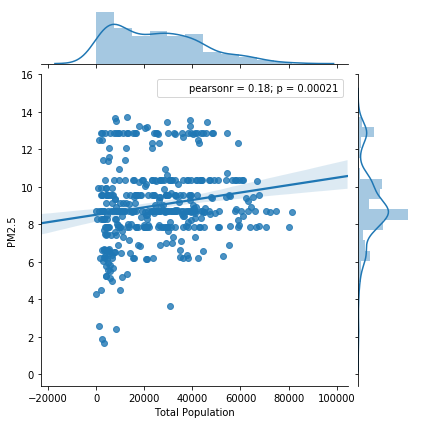

In [83]:
sns.jointplot(x='Total Population',y='PM2.5',data=zip_all,kind='reg')
plt.xlabel("Total Population")
plt.ylabel("PM2.5")
plt.show()

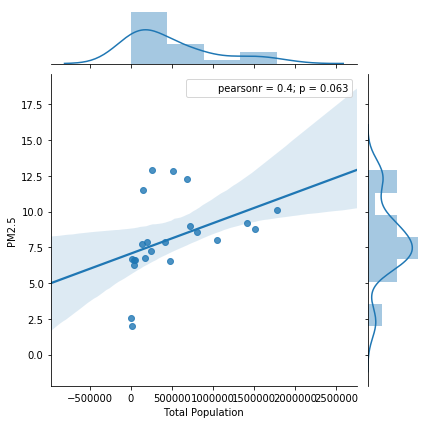

In [96]:
sns.jointplot(x='Total Population',y='PM2.5',data=county_all,kind='reg')
plt.xlabel("Total Population")
plt.ylabel("PM2.5")
plt.show()

In [84]:
#zip_all.plot("Traffic", "PM2.5", kind = 'scatter')
#plt.title("Traffic vs PM 2.5")
#plt.xlabel("Average Traffic of ZIP Code")
#plt.ylabel("PM 2.5 Concentration")
#plt.show()

In [85]:
#zip_all.plot("Traffic", "Diesel PM", kind = 'scatter')
#plt.title("Traffic vs Diesel PM")
#plt.xlabel("Average Traffic of ZIP Code")
#plt.ylabel("Diesel PM Concentration")
#plt.show()

In [86]:
#zip_all.plot("Poverty", "Pollution Burden", kind = 'scatter')
#plt.title("Poverty vs Pollution Burden")
#plt.xlabel("Average Poverty of ZIP Code")
#plt.ylabel("Average Pollution Burden")
#plt.show()

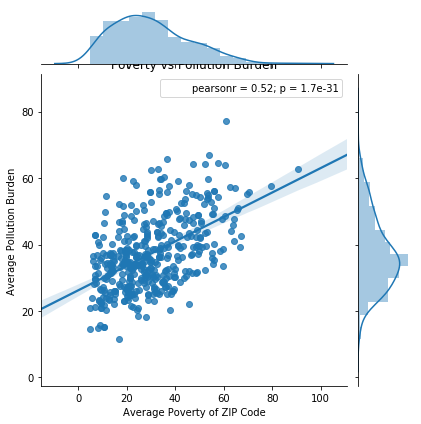

In [87]:
sns.jointplot(x='Poverty',y='Pollution Burden',data=zip_all,kind='reg')
plt.title("Poverty vs Pollution Burden")
plt.xlabel("Average Poverty of ZIP Code")
plt.ylabel("Average Pollution Burden")
plt.show()

In [88]:
#sns.jointplot(x='PM2.5',y='Asthma',data=zip_all,kind='reg')
#plt.title("Asthma vs PM2.5")
#plt.xlabel("PM2.5 Concentration")
#plt.ylabel("Total Asthma ER visits")
#plt.show()

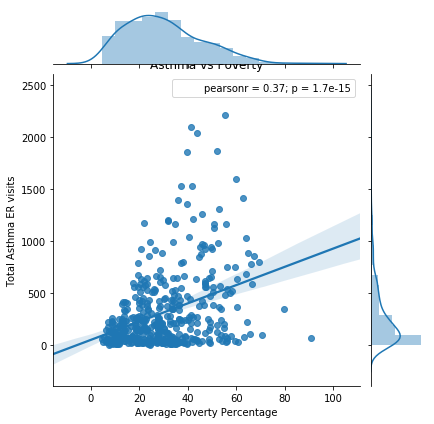

In [89]:
sns.jointplot(x='Poverty',y='Asthma',data=zip_all,kind='reg')
plt.title("Asthma vs Poverty")
plt.xlabel("Average Poverty Percentage")
plt.ylabel("Total Asthma ER visits")
plt.show()

In [90]:
#sns.jointplot(x='PM2.5',y='Low Birth Weight',data=zip_all,kind='reg')
#plt.title("Low Birth Weight vs PM2.5")
#plt.xlabel("PM2.5 Concentration")
#plt.ylabel("Low Birth Weight")
#plt.show()

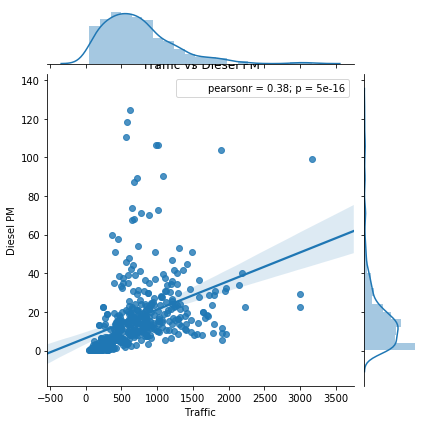

In [91]:
sns.jointplot(x='Traffic',y='Diesel PM',data=zip_all,kind='reg')
plt.title("Traffic vs Diesel PM")
plt.xlabel("Traffic")
plt.ylabel("Diesel PM")
plt.show()

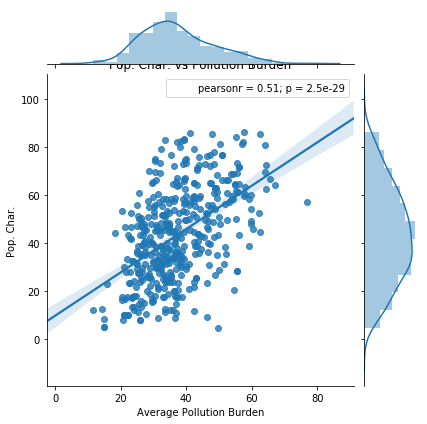

In [92]:
sns.jointplot(x='Pollution Burden',y='Pop. Char.',data=zip_all,kind='reg')
plt.title("Pop. Char. vs Pollution Burden")
plt.xlabel("Average Pollution Burden")
plt.ylabel("Pop. Char.")
plt.show()